In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [170]:
class GP:
    
    def _kernel(self, a, b, param):
        a = a.reshape(-1, 1)
        b = b.reshape(-1, 1)
        sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2*np.dot(a, b.T)
        return np.exp(-.5 * (1/param) * sqdist)
    
    def fit(self, X, y, param):
        self.kernel = self._kernel(X, X, param)
        self.X = X
        self.y = y
        self.param = param
        
    def predict(self, X):
        k_s = self._kernel(self.X, X, self.param)
        c = self._kernel(X, X, self.param)
        k_inv = np.linalg.inv(self.kernel)
        return k_s.T @ k_inv @ self.y, c - k_s.T @ k_inv @ k_s

In [180]:
X = np.arange(0, 1000, 10)
y = np.sin(X) + np.random.randn(X.shape[0]) + np.cos(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

G = GP()
G.fit(X_train, y_train, 0.01)
mean_squared_error(G.predict(X_test)[0], y_test)

2.88152791146407

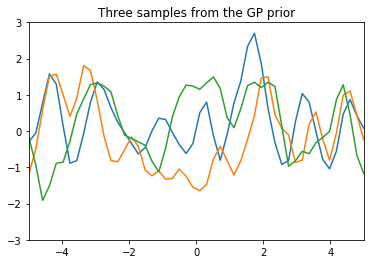

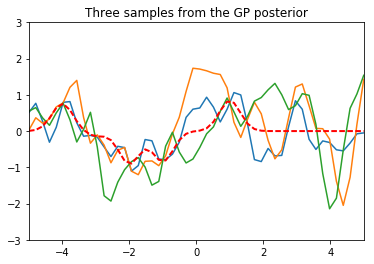

In [145]:
# An example from the web

# Test data
n = 50
X_test = np.linspace(-5, 5, n).reshape(-1, 1)

# Kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(X_test, X_test, param)

# Get the prior
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n, 3)))
# f_prior = np.dot(K_ss, np.random.normal(size=(n, 3)))

plt.plot(X_test, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()


X_train = np.array([-4, -3, -2, -1, 1]).reshape(5, 1)
y_train = np.sin(X_train)

K = kernel(X_train, X_train, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(X_train)))

K_s = kernel(X_train, X_test, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, y_train)).reshape((n, 1))

s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1, 1) + np.dot(L, np.random.normal(size=(n, 3)))

# plt.plot(X_train, y_train, 'bs', ms=8)
plt.plot(X_test, f_post)
# plt.gca().fill_between(X_test.flat, mu-2*stdv, mu+2*stdv, color='#dddddd')
plt.plot(X_test, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()